In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math as m

#def s(x, t):
#    return np.where((x - a * t * np.ones(L) <= 0), u1, u2)
    
def rs(f1, f2, a):
    return a * f1
    
def minmod(a, b):
    return np.where((a*b > 0), np.where(((abs(a) <= abs(b)) & (a*b > 0)), a, b), 0)

def maxmod(a, b):
    return np.where((a*b > 0), np.where(((abs(a) >= abs(b)) & (a*b > 0)), a, b), 0)

def minmod_lim(u):
    return minmod(u[1:-1] - u[:-2], u[2:] - u[1:-1])

def superbee(u):
    return maxmod(minmod(u[2:] - u[1:-1], 2*(u[1:-1] - u[:-2])),
                             minmod(2*(u[2:] - u[1:-1]), u[1:-1] - u[:-2]))

In [2]:
def solver(u0, ul, xl, xr, L, T, CFL, a, b):
    h = (xr - xl) / L 
    tau = h * CFL / a
    
    x = np.linspace(xl+h/2, xr-h/2, L)
    
    n = 0
    t = 0.
    
    # initial condition 
    u = u0(x)
    slope = np.zeros(L)
    tmp = np.zeros(L)
    f = np.zeros((L+1, 2))
    
    def u_an(x, t):
        return u0(x - a * t) * np.exp(- b * t * np.ones(L))
    
    while(t < T):
        t += tau
        # boundary condition
        f[0, 0] = ul(t)
        f[L, 1] = 0
        # reconstruction
        # compute slopes
        slope[1:-1] = h * minmod_lim(u)

        f[:-1, 1] = u - (h / 2) * slope
        f[1:, 0] = u + (h / 2) * slope
        # riemann solver - compute fluxes
        F = rs(f[:,0], f[:,1], a) # rs(f)
        # compute RHS
        R = (- F[1:] + F[:-1]) / h - b * u
        # update values
        tmp[0] = ul(t)
        tmp[1:] = u[1:] + tau * R[1:]
        u = tmp
        
    fig, ax = plt.subplots(figsize = (20,10))

    ax.plot(u, 'yo')
    ax.plot(u_an(x, T), 'k')
    print(np.linalg.norm(u - u_an(x, T), np.inf))
    return u

0.00246126223872839


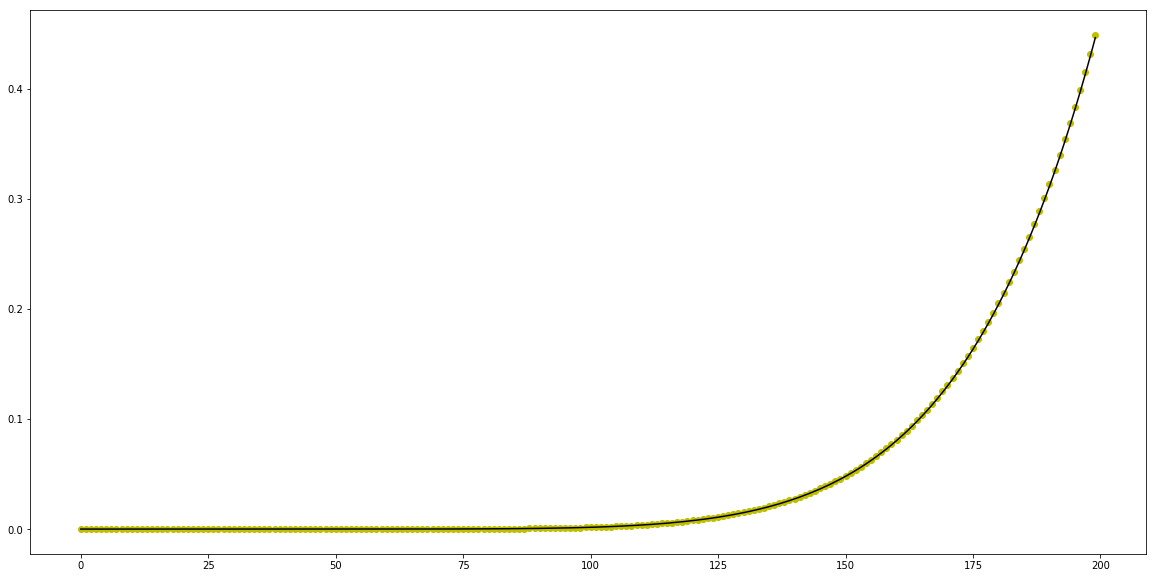

In [5]:
u0 = lambda x : np.where((x >= 0), x**7, 0.0)
#u0 = lambda x: np.where((x <= 0), 10., 20.)
ul = lambda t: 0.
u = solver(u0 = u0, ul = ul, xl = 0., xr = 1., L = 200, T = 0.1, CFL = 0.5, a = 1., b = 0.5)